In [2]:
import pandas as pd
data_path = '/sdcard/1/data.csv'
df = pd.read_csv(data_path,encoding='gbk')

In [3]:
# 获取微信好友性别比例
def get_sex_scale():
    male = female =other = 0
    total = len(df)
    for i in df.Sex:
        if i == 1:
            male += 1
        elif i == 2:
            female += 1
        else:
            other += 1
    print('你的微信好友情况:')
    print('好友总数:%d' %(total))
    print('男性好友：%.2f%%'%(float(male)/total*100))
    print('女性好友：%.2f%%'%(float(female)/total*100))
    print('不明性别好友:%.2f%%'%(float(other)/total*100))
    
    return male, female, other

In [4]:
# 获取好友地域分布函数
def get_count(var):
    dic = {}
    _list = list(set(var))
    for i in _list[1:]:
        if i is None:
            continue
        counts = len(df[var==i])
        #dic = {}
        dic[i] = counts
        #data.extend(dic)
    items = list(dic.items())
    items.sort(key=lambda x:x[1], reverse=True)
    return items

In [5]:
items_p = get_count(df.Province)
items_c = get_count(df.City)
#items_p = list(data_c.items())
# 字典按值大小排序
#items.sort(key=lambda x:x[1], reverse=True)


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline

# 设置字体

In [7]:
font_path = "/sdcard/1/font/方正标宋.ttf"
font = matplotlib.font_manager.FontProperties(fname=font_path, size=15)
plt.rcdefaults()

In [8]:
x = [items_p[i][1] for i in range(10)]
labels = [items_p[i][0] for i in range(10)] 

# 图像词云

In [ ]:
def get_signature():
    import re 
    siglist = []
    for i in df.Signature:
        try:
            signature = i.strip().replace("span"," ").replace("class"," ").replace("emoji"," ")
            rep = re.compile("1f\d+\w*|[<>/=]")
            signature = rep.sub(" ",signature)
            siglist.append(signature)
        except:
            continue
    text = " ".join(siglist)
    return text

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    s = "hsl(255, 0%%, %d%%)" % 0
    print(s)
    return s


if __name__ == '__main__':
    text = get_signature()
    #print(text)
    
    #把结巴分词包搞进来
    import jieba
    wordlist = jieba.cut(text, cut_all=True)
    word_space_split = " ".join(wordlist)
    import matplotlib.pyplot as plt
    %matplotlib inline
    from wordcloud import WordCloud, ImageColorGenerator
    import numpy as np
    import PIL.Image as Image
    img_path = '/sdcard/1/images/mike-17.png'
    coloring = np.array(Image.open(img_path))
    my_wordcloud = WordCloud(background_color="white", max_words=2000, mask=coloring, max_font_size=60, random_state=42, scale=4,font_path='/sdcard/1/font/方正标宋.ttf').generate(word_space_split)
    image_colors = ImageColorGenerator(coloring)
    plt.imshow(my_wordcloud.recolor(color_func=image_colors, random_state=3),interpolation='bilinear' )
    plt.imshow(my_wordcloud)
    plt.axis("off")
    plt.show()
    #plt.imsave("./mike-14.jpg",dpi=1600)
    #plt.imsave('./mike-8.jpg', dpi=1600)

Building prefix dict from the default dictionary ...
Loading model from cache /data/user/0/ru.iiec.pydroid3/cache/jieba.cache
Loading model cost 5.018 seconds.
Prefix dict has been built succesfully.


# 图像展示

In [ ]:
from PIL import Image
from pylab import *
img_path = "/sdcard/1/images/timg-17.jpg"
#图片过滤
img = Image.open(img_path)
img_blur = img.point(lambda x:0 if x>143 else 255)
new_img_path = "/sdcard/1/images/mike-17.png"
img_blur.save(new_img_path)
# 图片显示
im = plt.imread(new_img_path)
plt.title("Michael Jackson")
imshow(im)

# 饼状图 

In [10]:
plt.imsave?

你的微信好友情况:
好友总数:279
男性好友：20.07%
女性好友：75.63%
不明性别好友:4.30%


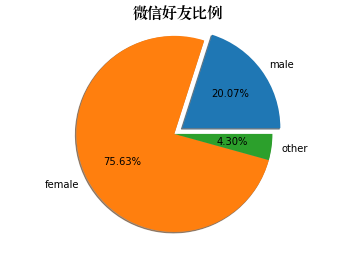

In [11]:
male,female,other = get_sex_scale()
X = [male,female,other]
label = ["male","female","other"]
explode=(0.2,0,0)
plt.pie(X,labels=label,radius=2,labeldistance=1.1,startangle=0,shadow=True,autopct='%1.2f%%',explode=explode)
plt.title("微信好友比例",fontproperties=font)
plt.axis("equal")
plt.show()

# 圆柱图

In [12]:
plt.pie?
plt.bar?

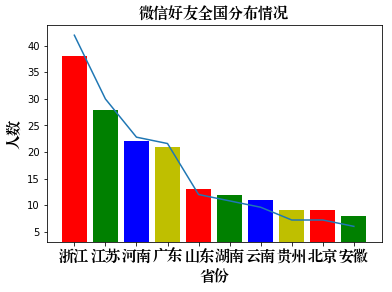

In [13]:
plt.bar(range(len(x)),x,bottom=3,color="rgby")
plt.plot(range(len(x)),[i*1.2 for i in x])
plt.xticks(range(len(x)), labels,fontproperties=font)
plt.xlabel("省份",fontproperties=font)
plt.ylabel("人数",fontproperties=font)
plt.title("微信好友全国分布情况", fontproperties=font)
plt.show()

# 条形图

AttributeError: 'Text' object has no attribute 'copy'

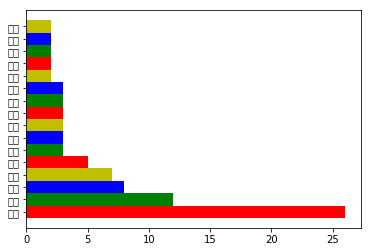

In [52]:
x = [items_c[i][1] for i in range(16)]
labels = [items_c[i][0] for i in range(16)] 
plt.barh(range(len(x)),x,height=1,color="rgby")
plt.yticks(range(len(x)), labels, fontproperties=font)
plt.title("微信好友城市分布", fontproperties=font)
plt.xlabel("数量: 人", fontproperties=font)
plt.ylabel("城市", fontproperties=font)
plt.axis([0,10,-1,30])
plt.show()

AttributeError: 'Text' object has no attribute 'copy'

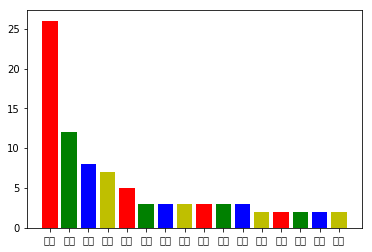

In [53]:
plt.bar(range(len(x)),x, color="rgby")
plt.xticks(range(len(x)), labels,fontproperties=font)
plt.xlabel("省份",fontproperties=font)
plt.ylabel("人数",fontproperties=font)
plt.title("微信好友全国分布情况", fontproperties=font)
plt.show()

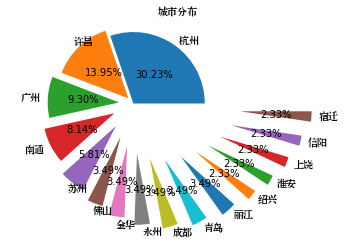

In [55]:
# import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
%matplotlib inline
# 使用字体管理器
myfont = matplotlib.font_manager.FontProperties(fname='/sdcard/1/font/方正标宋.ttf',size=10)
# windows 设置
#plt.rcParams['font.sans-serif'] = ['font']#设置默认字体
#plt.rcParams['axes.unicode_minus'] = False#解决保存图像是符号，显示是方块的问题
#fig = plt.figure()
pie=plt.pie(x,labels=labels,startangle=0,pctdistance=0.5,center=(1,20),autopct='%1.2f%%',explode=np.linspace(0,1.5,len(x)))
for font in pie[1]:  
    font.set_fontproperties(myfont)
plt.title("城市分布",fontproperties=myfont)
plt.axis("equal")
plt.show()

In [36]:
plt.pie?

# 气泡图

In [1]:
plt.scatter(range(len(x)),x,s=x*2, alpha=0.9, color="rgby")
plt.xticks(range(len(x)), labels, fontproperties=font)
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

# 曲线图

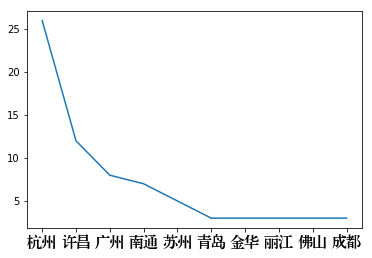

In [18]:
plt.plot(range(len(x)), x)
plt.xticks(range(len(x)), labels, fontproperties=font)
plt.show()

In [19]:
plt.savefig('/sdcard/1/images/scale.png')

In [20]:
df[1:]

,Unnamed: 0,City,NickName,Province,Sex,Signature
1,1,NaN,张凤祥,NaN,0,奋斗就是生活！\r\n人生只有前进！
2,2,苏州,?笑笑,江苏,2,"<span class=""emoji emoji1f603""></span>你不尊重我，就别..."
3,3,Maoming,么么哒,Kowloon City,2,努力改变自己，加油！
4,4,东营,丫头爱赖床,山东,2,没有一百分的另一半，只有五十分的两个人，凑成一百分的两口子
5,5,NaN,sao,Viedma,2,NaN
6,6,NaN,格格,NaN,2,强者不一定会赢，但赢的人一定是强者。
7,7,曲靖,《我热爱(°ο°)我纠结》,云南,2,永远是一个很简单的词，确成了很难兑现的诺言
8,8,永州,丫头,湖南,2,你若不坚强，懦弱给谁看
9,9,通化,彤彤,吉林,2,我要努力奋斗，好好工作。。加油！加油！
10,10,遵义,罗思,贵州,2,我是思思


In [32]:
import pandas as pd

# friends[0]是自己的信息，因此我们要从[1:]开始
data = pd.DataFrame()
columns=['NickName', 'Sex', 'Province', 'City', 'Signature']
for col in columns:
    val = []
    for i in df[1:]:
        val.append(i[col])
    data[col] = pd.Series(val)

TypeError: string indices must be integers

ValueError: incompatible sizes: argument 'height' must be length 1 or scalar

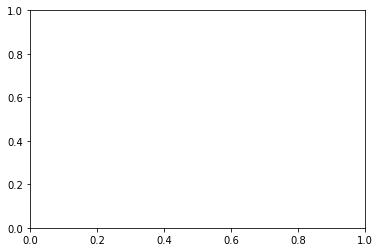

In [33]:
#plt.rcParams['font.sans-serif']=['SimHei']
#plt.rcdefaults()
x_pos = len(df)
performs = df.Province.value_counts()
people = df.Province.value_counts().index
plt.bar(x_pos,performs)
plt.xticks(x_pos,people)
plt.show()

In [34]:
df.Province.value_counts().index

Index(['浙江', '江苏', '河南', '广东', '山东', '湖南', '云南', '贵州', '北京', '安徽', '江西', '上海',
       '山西', '陕西', '广西', '辽宁', '福建', '吉林', '四川', '湖北', '河北', 'Dubayy', 'Paris',
       '甘肃', 'Vienna', '新疆', 'Carlow', 'Wan Chai', 'Jeju-do', '宁夏', 'Cork',
       'Dublin', '澳门', 'Kilkenny', 'Tipperary', 'Addu Atoll', 'Viedma',
       'Seoul', '海南', '香港', '黑龙江', 'Northern Territory', 'Chiayi City',
       'Galway', 'Xinjiang', 'Oshawa', 'Kowloon City', '青海', 'Abha',
       'South Huvadhu Atoll', '内蒙古', 'Amapa'],
      dtype='object')